In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [4]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
 sep='\t',usecols=columns)
df.head()


,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.replace({'Y': 1, 'N': 0}, inplace=True)

In [6]:
df.dropna(axis='index', inplace=True)

In [7]:
df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2929 non-null   int64  
 1   Overall Cond   2929 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2929 non-null   int64  
 4   Gr Liv Area    2929 non-null   int64  
 5   SalePrice      2929 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 160.2 KB


In [9]:
df.describe()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
count,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000,2929.000000
mean,6.095596,5.562649,1051.614544,0.933083,1499.896552,180830.814612
std,1.410736,1.111409,440.615067,0.249921,505.472056,79878.175546
min,1.000000,1.000000,0.000000,0.000000,334.000000,12789.000000
25%,5.000000,5.000000,793.000000,1.000000,1126.000000,129500.000000
50%,6.000000,5.000000,990.000000,1.000000,1442.000000,160000.000000
75%,7.000000,6.000000,1302.000000,1.000000,1743.000000,213500.000000
max,10.000000,9.000000,6110.000000,1.000000,5642.000000,755000.000000


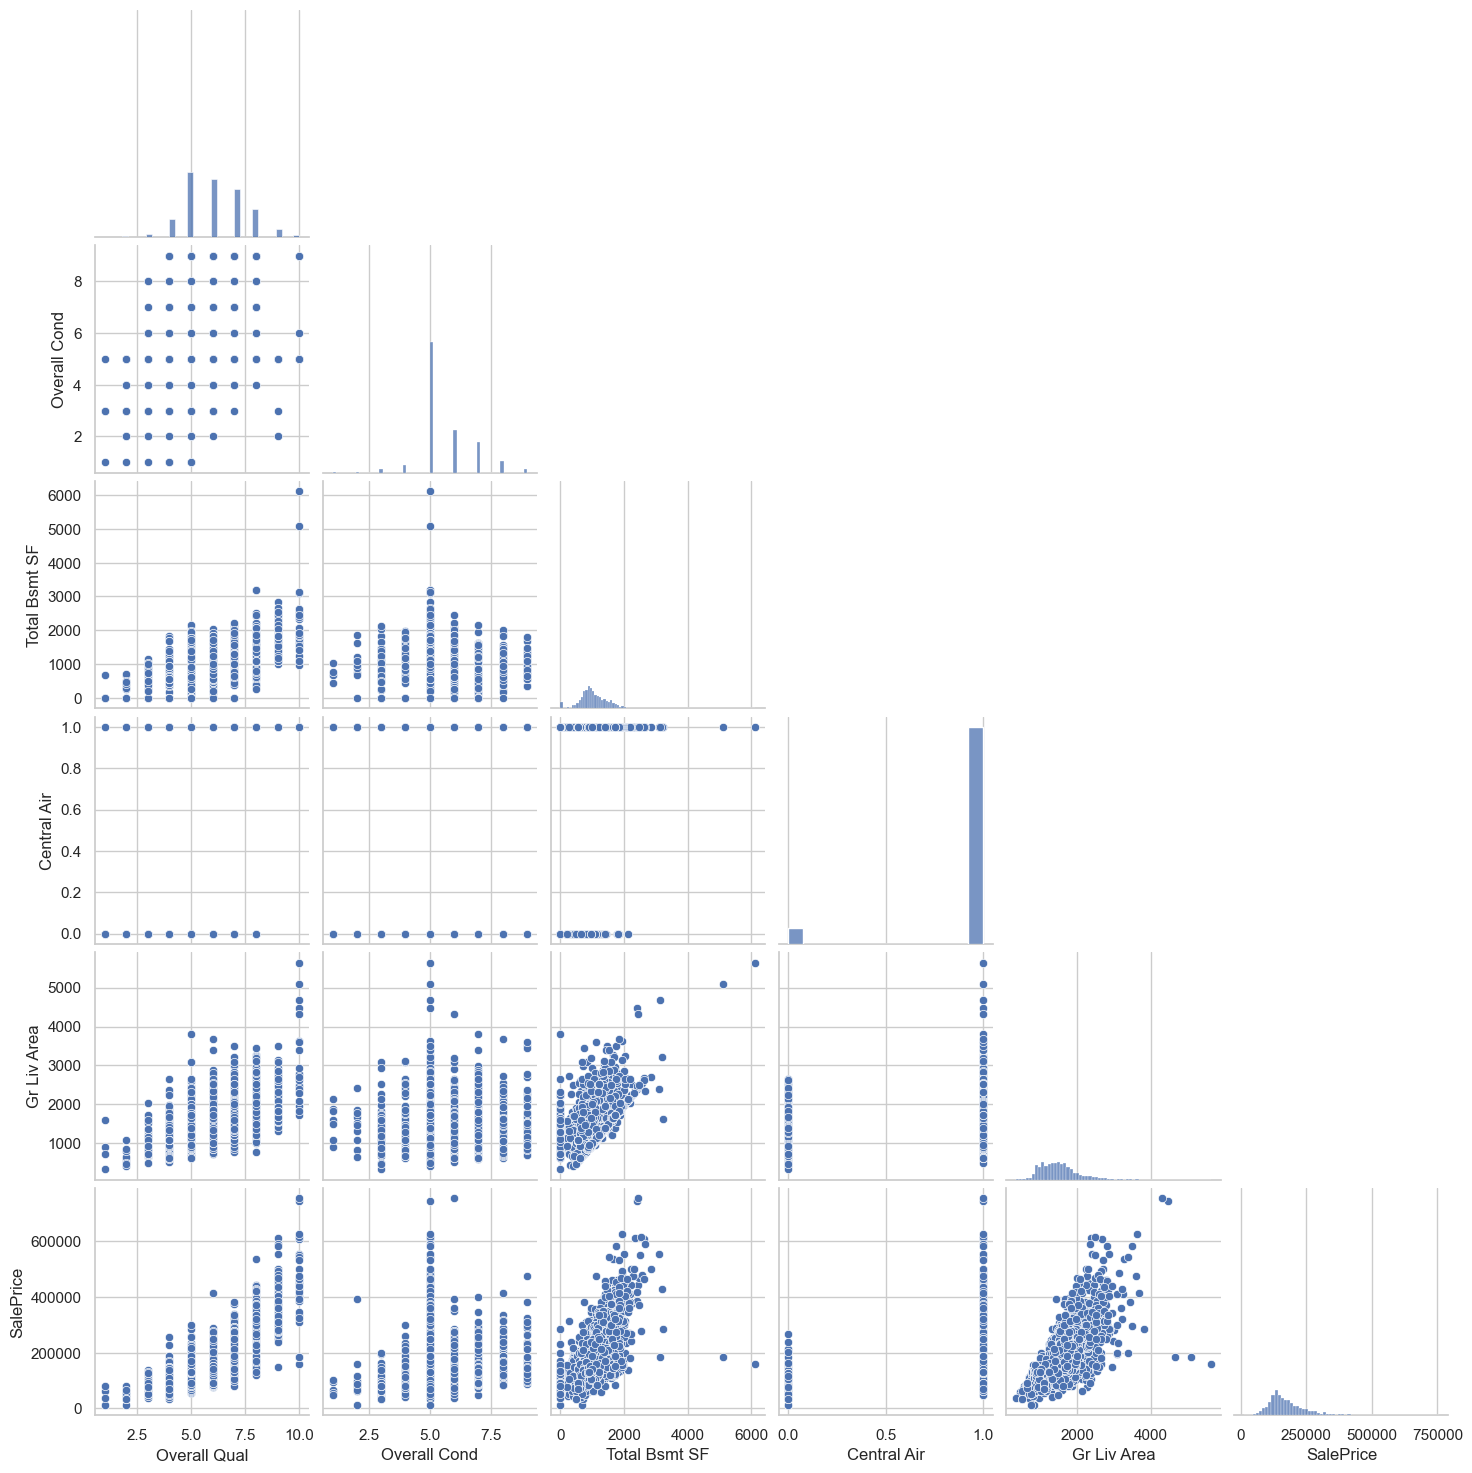

In [10]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, height=2.5, corner=True)
plt.show()

<Axes: >

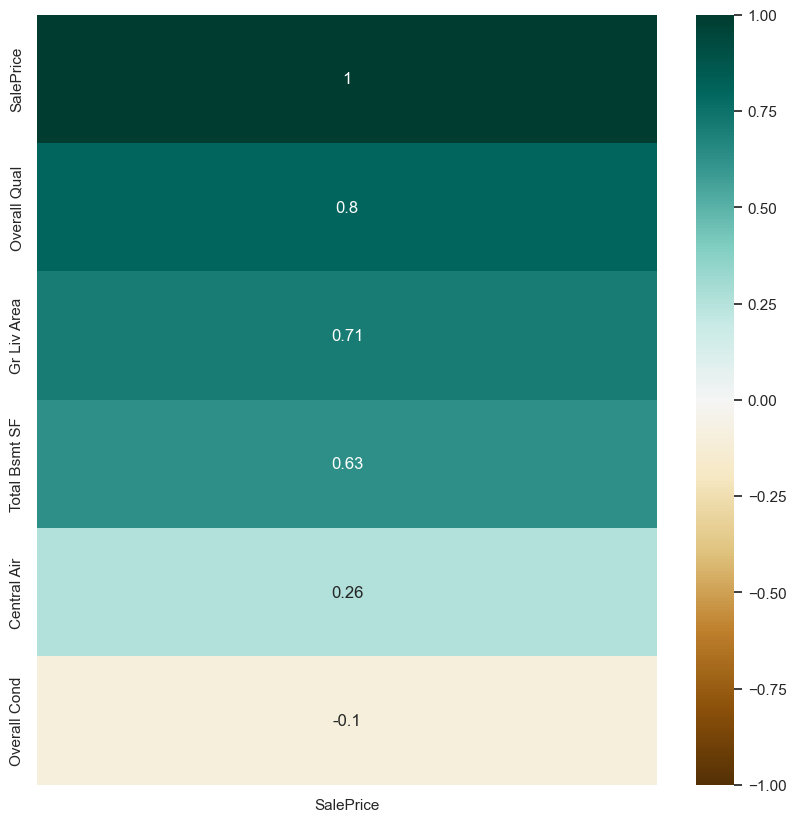

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap( df.corr()[['SalePrice']].sort_values( by = 'SalePrice', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='BrBG')

**Solving regression for regression parameters with gradient descent**

In [12]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    def predict(self, X):
        return self.net_input(X)

In [13]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

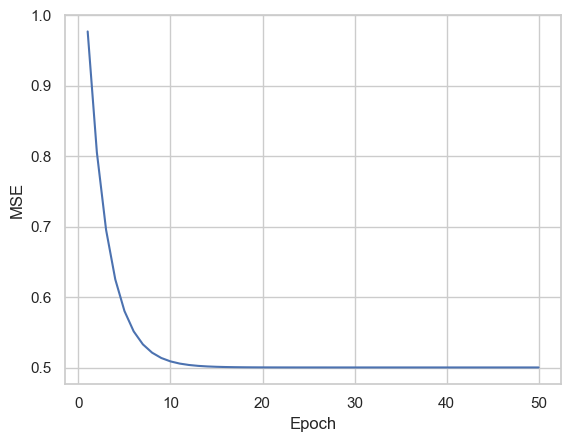

In [14]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

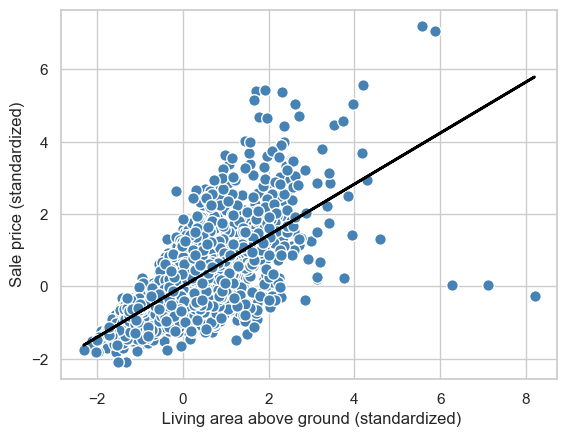

In [16]:
lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [17]:
#In this code example, we used the previously trained linear regression model to predict the price of
#a house with an aboveground living area of 2,500 square feet. According to our model, such a house will be worth $292,507.07.
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')

Sales price: $292507.07


In [18]:
print(f'Slope: {lr.w_[0]:.3f}')

print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


**Estimating the coefficient of a regression model via scikit-learn**

In [19]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')


Slope: 111.666
Intercept: 13342.979


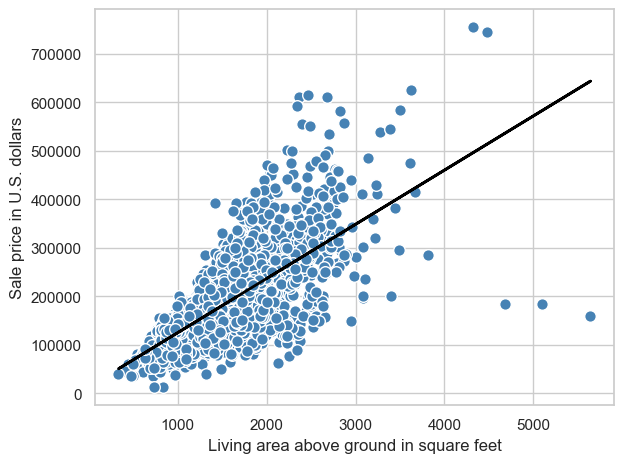

In [20]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

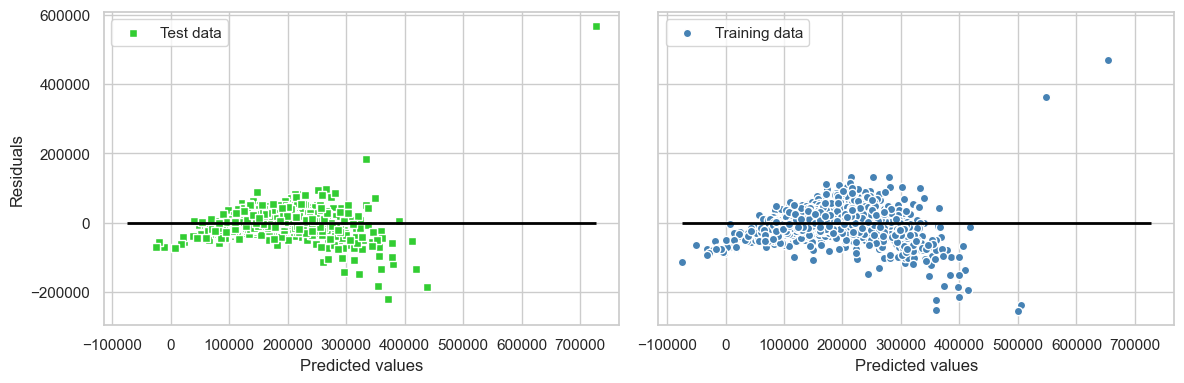

In [23]:
x_max = np.max(
[np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min(
[np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(
1, 2, figsize=(12, 4), sharey=True)
ax1.scatter(
y_test_pred, y_test_pred - y_test,
c='limegreen', marker='s',
edgecolor='white',
label='Test data')
ax2.scatter(
y_train_pred, y_train_pred - y_train,
c='steelblue', marker='o', edgecolor='white',
label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
    color='black', lw=2)
    plt.tight_layout()
plt.show() 

In [24]:
np.min(y_test), np.min(y_train)

(35311, 12789)

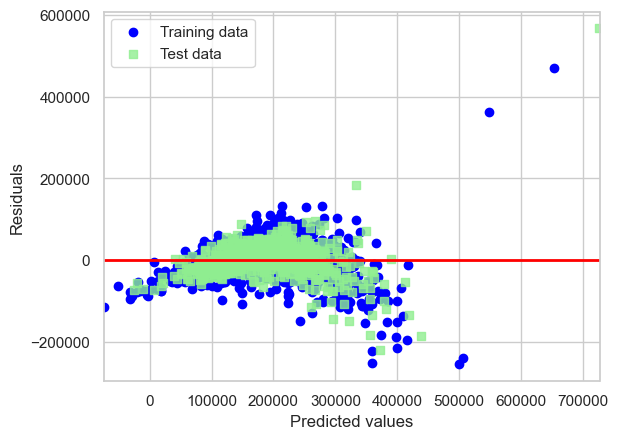

In [25]:
plt.scatter(y_train_pred, y_train_pred - y_train,
c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='lightgreen', marker='s', label='Test data', alpha=.8)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=x_min-100, xmax=x_max+100, lw=2, color='red')
plt.xlim([x_min, x_max])
plt.show()

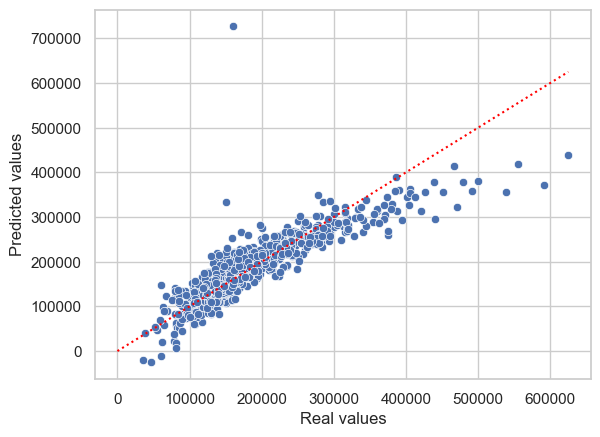

In [26]:
x = np.linspace(0, y_test.max())
y = x

plt.plot(x, y, color="red", ls=":")

sns.scatterplot(x=y_test, y=y_test_pred)

plt.xlabel("Real values")
plt.ylabel("Predicted values")

plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))

MSE train: 1497216245.853, test: 1516565820.999


In [28]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')

print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


In [29]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))


R^2 train: 0.769, test: 0.752
